***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.4.1 UV Coverage: UV tracks](4_4_1_UV_Coverage_UV_Tracks.ipynb)
    * Next: [4.5 The Fourier Approximation & the Van Cittert-Zernike theorem](4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb)

***

In [82]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotBL
import numpy as np

%matplotlib inline

styles = open("../style/course.css", "r").read()
HTML(styles)


---
# Outline

### 4.4.2 Improving your coverage

* Intro: how to accumulate more samples from the sky? (reconfiguration, time, frequency integration)


* 4.4.2.A Configuration of an N-element interferometer
    
* 4.4.2.B Integration in time: Earth Rotation Synthesis    
    
* 4.4.2.C Integration in frequency: Frequency Synthesis
    - $u$,$v$,$w$ are frequency dependent (different $\lambda$ == different $u$,$v$,$w$)
    - Effect on the uv plane: [1 channel, 10 chan, 50 chan]
    - effect on the PSF (pointer to Griffin)
    - ERS-optimized arrays (optional)
    
---

---

---

#### Intro: how to accumulate more samples from the sky? (reconfiguration, time, frequency integration)

#### 4.4.2.A Configuration of an N-element interferometer
    - VLA: A, B, C, D ... compound uv coverage

Let's defined a couple of useful functions to simulate a N-element interferometer.

Baseline conversion $ENU$ $\leftrightarrow$ $XYZ$

Baseline conversion $ENU$ $\leftrightarrow$ $XYZ$

In [83]:
config = widgets.Dropdown(
    options={'VLAa':'configs/vlaa.enu.txt',
        'VLAb':'configs/vlab.enu.txt',
        'VLAc':'configs/vlac.enu.txt',
        'VLAd':'configs/vlad.enu.txt',
        'WSRT':'configs/wsrt.enu.txt',
        'kat7':'configs/kat-7.enu.txt',
        'meerkat':'configs/meerkat.enu.txt'},
    value="configs/vlaa.enu.txt",
    Description="Antennas:")

display(config)

# List of instruments

In [84]:
#config=instruments['VLAa']
antennaPosition=np.genfromtxt(config.value)

From the list define above, you can select different configurations corresponding to real instrumental layout.
Conversely, you can also edit your own by setting custom to 1.

In [85]:
# Custom antenna distribution
custom=0
if (custom):
    antennaPosition = np.zeros((10, 2), dtype=float)
    antennaPosition[0,:] = [0,0]
    antennaPosition[1,:] = [-4, 5]
    antennaPosition[2,:] = [4, 5]
    antennaPosition[3,:] = [-10,0]
    antennaPosition[4,:] = [-8,-3]
    antennaPosition[5,:] = [-4,-5]
    antennaPosition[6,:] = [0,-6]
    antennaPosition[7,:] = [4,-5]
    antennaPosition[8,:] = [8,-3]
    antennaPosition[9,:] = [10,0]

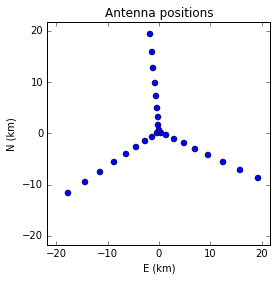

In [86]:
%matplotlib inline
mxabs = np.max(abs(antennaPosition[:]))*1.1;
# make use of pylab librery to plot
plt.plot((antennaPosition[:,0]-np.mean(antennaPosition[:,0]))/1e3, (antennaPosition[:,1]-np.mean(antennaPosition[:,1]))/1e3, 'o')
plt.axes().set_aspect('equal')
plt.xlim(-mxabs/1e3, mxabs/1e3)
plt.ylim(-mxabs/1e3, (mxabs+5)/1e3)
plt.xlabel("E (km)")
plt.ylabel("N (km)")
plt.title("Antenna positions")

** Observation configuration **

In [87]:
# Observation parameters
c=3e8                                         # Speed of light
f=1420e6                                      # Frequency
lam = c/f                                     # Wavelength 

time_steps = 1200                              # time steps
h = np.linspace(-6,6,num=time_steps)*np.pi/12 # Hour angle window

# declination convert in radian

L = np.radians(34.0790)      # Latitude of the VLA
dec = np.radians(34.)

** The *snapshot* $\boldsymbol{uv}$ coverage **

Enter ntimes up to 1200


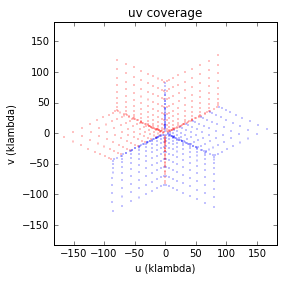

In [88]:
from ipywidgets import *
import ipywidgets as widgets
from IPython.display import display

from ipywidgets import interact

print "Enter ntimes up to "+str(time_steps)


#w=IntSlider()
Ntimes=2
#display(w)
plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)

#interact(plotBL.plotuv,antennaPos=antennaPosition,h=h,L=(-90,90.,1), dec=(-90,90,1),Ntimes=[0,1200,1],lamb=lam)

#### 4.4.2.B Integration in time: Earth Rotation Synthesis
    - as depicted before: uv tracks
    - Effect on the uv plane: [ snapshot, 1h, 3h, ... 6h, 9h ... 12h]
    - effect on the PSF (pointer to Griffin)
    - ERS-optimized arrays (optional)
   

** Half of the observing window **

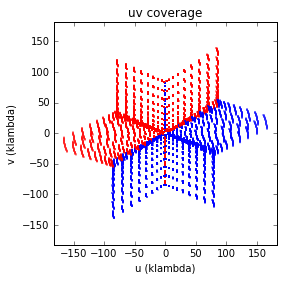

In [89]:
%matplotlib inline
Ntimes=100
plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)

** The full observing window **

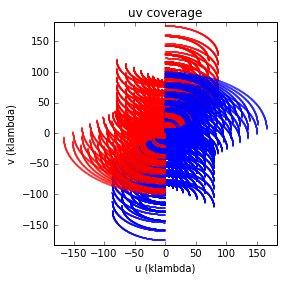

In [90]:
Ntimes=600
plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)

We can see that with a variety of different baselines, on can easily 

#### 4.4.2.C Integration in frequency: Frequency Synthesis
    - $u$,$v$,$w$ are frequency dependent (different $\lambda$ == different $u$,$v$,$w$)
    - Effect on the uv plane: [1 channel, 10 chan, 50 chan]
    - effect on the PSF (pointer to Griffin)
    - ERS-optimized arrays (optional)

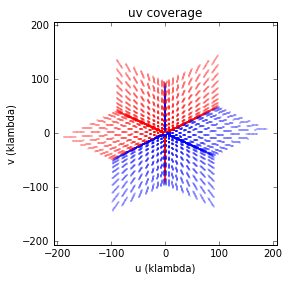

In [91]:
Nfreqs=20 # number of frequency channels
df=10e6 # frequency step
f0=c/lam # starting frequency
lamb0=lam # starting wavelength

plotBL.plotuv_freq(antennaPosition,L,dec,h,Nfreqs,lamb0,df)

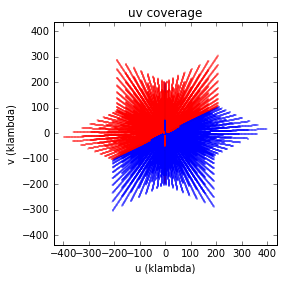

In [92]:
Nfreqs=200 # number of frequency channels

plotBL.plotuv_freq(antennaPosition,L,dec,h,Nfreqs,lamb0,df)

<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>
  <br>
  
&bull; *The measured spatial frequency depends on the length of the **projected** baseline* <br><br>
&bull; *The measured spatial frequency depends on the length of the **projected** baseline*
</p>

---
* [Go back up](#beginning) <!--\ref{beginning}--> 
     * Or continue to next section: [4.4.3 UV Coverage: Limits of integration -->](4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb)